In [12]:
import pandas as pd
import numpy as np
import scipy.stats as spstats
import matplotlib as mpl
from matplotlib import pyplot
%matplotlib inline

In [13]:
url='https://raw.githubusercontent.com/dipanjanS/practical-machine-learning-with-python/master/notebooks/Ch04_Feature_Engineering_and_Selection/datasets/Pokemon.csv'
poke_def=pd.read_csv(url)
print(poke_def.head(n=10))
poke_def['HP'].head()
poke_def[['HP','Attack','Defense']].head()

   #                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1                  Bulbasaur  Grass  Poison    318  45      49       49   
1  2                    Ivysaur  Grass  Poison    405  60      62       63   
2  3                   Venusaur  Grass  Poison    525  80      82       83   
3  3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4                 Charmander   Fire     NaN    309  39      52       43   
5  5                 Charmeleon   Fire     NaN    405  58      64       58   
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   
9  7                   Squirtle  Water     NaN    314  44      48       65   

   Sp. Atk  Sp. Def  Speed Generation  Legendary  
0       65       65     45      Gen 1      False  
1       80       80     60      Gen 1  

,HP,Attack,Defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43


In [14]:
poke_def[['HP','Attack','Defense']].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


In [21]:
#For column having frequency or count conversion
from sklearn.preprocessing import Binarizer
url='https://raw.githubusercontent.com/dipanjanS/practical-machine-learning-with-python/master/notebooks/Ch04_Feature_Engineering_and_Selection/datasets/song_views.csv'
vg_df=pd.read_csv(url)
vg_df.head()
#frequency or count are not relevant as we only want to find whether song has been heard by him or not
watched=np.array(vg_df['listen_count'])
watched[watched>=1]=1
#print(watched)
vg_df['watched']=watched
vg_df.head(10)
#Direct using Binarizer
bn=Binarizer(threshold=0.9)
#threshold means values below or equal to this are replaced by 0 else 1
pd_watched=bn.transform([vg_df['listen_count']])[0]
#make array having just one column last [0]
#print(pd_watched)
vg_df['pd_watched']=pd_watched
vg_df.head(10)



,user_id,song_id,title,listen_count,watched,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0,0


Difference between transform and fit_transform
To center the data (make it have zero mean and unit standard error), you subtract the mean and then divide the result by the standard deviation.

x′=x−μσ
You do that on the training set of data. But then you have to apply the same transformation to your testing set (e.g. in cross-validation), or to newly obtained examples before forecast. But you have to use the same two parameters μ and σ (values) that you used for centering the training set.

Hence, every sklearn's transform's fit() just calculates the parameters (e.g. μ and σ in case of StandardScaler) and saves them as an internal objects state. Afterwards, you can call its transform() method to apply the transformation to a particular set of examples.

fit_transform() joins these two steps and is used for the initial fitting of parameters on the training set x, but it also returns a transformed x′. Internally, it just calls first fit() and then transform() on the same data.

In [23]:
#We will talk about rounding percentage or proportions
url='https://raw.githubusercontent.com/dipanjanS/practical-machine-learning-with-python/master/notebooks/Ch04_Feature_Engineering_and_Selection/datasets/item_popularity.csv'
items_popularity=pd.read_csv(url)
items_popularity.head()
items_popularity['popularity_scale_10']=np.array(np.round((items_popularity['pop_percent']*10)),dtype='int')
items_popularity.head()

,item_id,pop_percent,popularity_scale_10
0,it_01345,0.98324,10
1,it_03431,0.56123,6
2,it_04572,0.12098,1
3,it_98021,0.35476,4
4,it_01298,0.92101,9


In [33]:
#we will talk about interaction where feature^2 should also be taken into considerations
from sklearn.preprocessing import PolynomialFeatures
atk_def=poke_def[['Attack','Defense']]
atk_def.head()
#PolynomialFeatures degree=2 interaction_only- features which are product of at most degree distinct input feature
#interaction means x,y,x*y not x^^2 y^^2
#include_bias=if true include a bias column the feature in which all polynomial power =0 x^0y^0
#include_bias means one column with all zeros
#order of output array in densecase 'F' is faster to compute
pf=PolynomialFeatures(degree=2,interaction_only=False,include_bias=False,order='C')
res=pf.fit_transform(atk_def)
print(res)
#now to know which column represent which features multiplication
pd.DataFrame(pf.powers_,columns=['Attack_Degree','Defence_degree'])
intr_features=pd.DataFrame(res,columns=['Attack','Defense','Attack^2','Attack*defense','Defense^2'])
intr_features.head()


[[   49.    49.  2401.  2401.  2401.]
 [   62.    63.  3844.  3906.  3969.]
 [   82.    83.  6724.  6806.  6889.]
 ...
 [  110.    60. 12100.  6600.  3600.]
 [  160.    60. 25600.  9600.  3600.]
 [  110.   120. 12100. 13200. 14400.]]


,Attack,Defense,Attack^2,Attack*defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0


In [35]:
#transforming new data in the features
#since using fit_transform stores the parameters involved in transformation as its internal state object
new_df=pd.DataFrame([[95,75],[121,120],[77,60]],columns=['Attack','Defense'])
print(new_df)
new_res=pf.transform(new_df)
new_intr_features=pd.DataFrame(new_res,columns=['Attack','Defense','Attack^2','Attack*defense','Defense^2'])
print(new_intr_features)

   Attack  Defense
0      95       75
1     121      120
2      77       60
   Attack  Defense  Attack^2  Attack*defense  Defense^2
0    95.0     75.0    9025.0          7125.0     5625.0
1   121.0    120.0   14641.0         14520.0    14400.0
2    77.0     60.0    5929.0          4620.0     3600.0


In [37]:
#Binning: Since Distribution of values are skewed or soe value occur quite frequently in test data
#continuous numeric attributes ko discrete ones mein. Discrete ones will act as a Bin for continuosly numeric values
url = 'https://raw.githubusercontent.com/dipanjanS/practical-machine-learning-with-python/master/notebooks/Ch04_Feature_Engineering_and_Selection/datasets/fcc_2016_coder_survey_subset.csv'
fcc_survey_df=pd.read_csv(url)
fcc_survey_df.head()
fcc_survey_df[['ID.x','EmploymentField','Age','Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


,ID.x,EmploymentField,Age,Income,Age_bin_round
15615,734bc2496485b7857ade38d4490cd1ec,software development and IT,39.0,10000.0,3.0
15616,8d838e8e4604e995d83c95ab764fe78c,software development and IT,27.0,10000.0,2.0
15617,5b1323796ca6ab9a58936ff772dbb988,NaN,37.0,48000.0,3.0
15618,afe9f743395dedb14b09fe3e1c4db2a6,education,26.0,10000.0,2.0
15619,bcfd613973e7746c38f49cd8dfd9ec6c,"arts, entertainment, sports, or media",22.0,18000.0,2.0


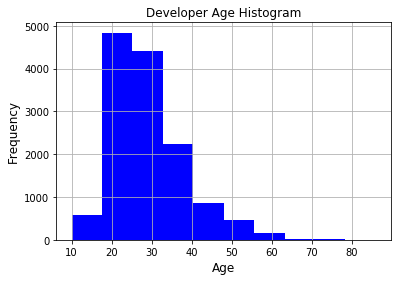

In [40]:
#fixed width binning
fig,ax=pyplot.subplots()
fcc_survey_df['Age'].hist(color='blue')
ax.set_title("Developer Age Histogram", fontsize=12)
ax.set_xlabel("Age",fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
#fixed width binning
fcc_survey_df['Age_bin_round']=np.array(np.floor(np.array(fcc_survey_df['Age'])/10.))
fcc_survey_df[['ID.x','EmploymentField','Age','Income','Age_bin_round']].tail()

In [41]:
#custom based range
bin_ranges=[0,15,30,45,60,75,100]
bin_names=[1,2,3,4,5,6]
fcc_survey_df['Age_bin_custom_range']=pd.cut(np.array(fcc_survey_df['Age']),bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label']=pd.cut(np.array(fcc_survey_df['Age']),bins=bin_ranges,labels=bin_names)
fcc_survey_df[['ID.x','EmploymentField','Age','Income','Age_bin_round','Age_bin_custom_range','Age_bin_custom_label']].tail()


,ID.x,EmploymentField,Age,Income,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
15615,734bc2496485b7857ade38d4490cd1ec,software development and IT,39.0,10000.0,3.0,"(30, 45]",3
15616,8d838e8e4604e995d83c95ab764fe78c,software development and IT,27.0,10000.0,2.0,"(15, 30]",2
15617,5b1323796ca6ab9a58936ff772dbb988,NaN,37.0,48000.0,3.0,"(30, 45]",3
15618,afe9f743395dedb14b09fe3e1c4db2a6,education,26.0,10000.0,2.0,"(15, 30]",2
15619,bcfd613973e7746c38f49cd8dfd9ec6c,"arts, entertainment, sports, or media",22.0,18000.0,2.0,"(15, 30]",2


0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64


,ID.x,Age,Income,Income_quarltile_range,Income_quarltile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


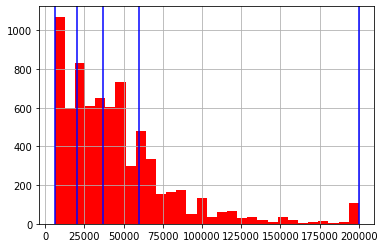

In [48]:
#quantile based n=binning
fcc_survey_df[['ID.x','Age','Income']].iloc[4:9]
fig,ax=pyplot.subplots()
fcc_survey_df['Income'].hist(bins=30,color='red')
quantile_list=[0,0.25,0.5,0.75,1.0]
quantiles=fcc_survey_df['Income'].quantile(quantile_list)
print(quantiles)
for quantile in quantiles:
    qvl=pyplot.axvline(quantile,color='blue')
quantile_labels=['0-25Q','25-50Q','50-75Q','75-100Q']
fcc_survey_df['Income_quarltile_range']=pd.qcut(fcc_survey_df['Income'],q=quantile_list)
fcc_survey_df['Income_quarltile_label']=pd.qcut(fcc_survey_df['Income'],q=quantile_list,labels=quantile_labels)

fcc_survey_df[['ID.x','Age','Income','Income_quarltile_range','Income_quarltile_label']].iloc[4:9]



In [50]:
#mathematical transformation
#Box cox transform
#for log directly use np.log(1+) and made pyplot.axvline(np.round(np.mean(log),2))
#see this for box cox implementation https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/notebooks/Ch04_Feature_Engineering_and_Selection/Feature%20Engineering%20on%20Numeric%20Data.ipynb
income=np.array(fcc_survey_df['Income'])
income_clean=income[~np.isnan(income)]
l,opt_lambda=spstats.boxcox(income_clean)
print(opt_lambda)
fcc_survey_df['Income_boxcox_lambda_0']=spstats.boxcox((1+fcc_survey_df['Income']),lmbda=0)
fcc_survey_df['Income_boxcox_lambda_opt']=spstats.boxcox((1+fcc_survey_df['Income']),lmbda=opt_lambda)
fcc_survey_df[['ID.x','Age','Income','Income_boxcox_lambda_0','Income_boxcox_lambda_opt']].head()


0.11799122497648248


C:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1044: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


,ID.x,Age,Income,Income_boxcox_lambda_0,Income_boxcox_lambda_opt
0,cef35615d61b202f1dc794ef2746df14,28.0,32000.0,10.373522,20.346524
1,323e5a113644d18185c743c241407754,22.0,15000.0,9.615872,17.881785
2,b29a1027e5cd062e654a63764157461d,19.0,48000.0,10.778977,21.758873
3,04a11e4bcb573a1261eb0d9948d32637,26.0,43000.0,10.668979,21.369004
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681,15.181132


Box cox method find best lambda for which standard deviation is minimal for the given data with lambda varying from -5 to +5
Assumptions is that among all transformation the data with smallest std is likely to be more normally distributed
The box cox only work when all data are positive>0
Although for negative value we can add some constant



